<a href="https://colab.research.google.com/github/DavidJara14/AlgoritmosB-squeda/blob/main/Pr%C3%A1ctica2_AStar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A*

Parte 1: A* aplicado a rutas de metro
Descripción del problema:
Un turista está visitando una ciudad y quiere encontrar la ruta más rápida entre dos
estaciones de metro. Se tiene información sobre las conexiones entre estaciones y una
estimación del tiempo de viaje entre ellas.
Tareas:
1. Modelar el mapa del metro como un grafo, donde los nodos son estaciones y los
arcos representan conexiones con tiempos de viaje.
2. Implementar el algoritmo A* para encontrar la mejor ruta entre dos estaciones
dadas.
3. Probar el algoritmo con al menos dos pares de estaciones y analizar los resultados.

###Creamos el dataseed de las estaciones del metro

In [2]:
#Key -> Nombre de la estacion : Value -> Cantidad de sitios visitados
dicctionaryValuesNode = {
  "Pantitlan":0,
  "El_rosario":1,
  "Instituto_del_petroleo":6,
  "Deportivo_18_de_Marzo":6,
  "La_Raza":6,
  "Martin_Carrera":5,
  "Consulado":4,
  "Tacuba":10,
  "Oceania":2,
  "Guerrero":10,
  "Garibaldi":10,
  "Hidalgo":10,
  "Bellas_artes":10,
  "Morelos":5,
  "San_Lazaro":5,
  "Balderas":8,
  "Salto_del_agua":7,
  "Pino_suarez":6,
  "Candelaria":5,
  "Tacubaya":10,
  "CentroMedico":7,
  "Chabacano":5,
  "Jamaica":4,
  "Santa_Anita":4,
  "Mixcoac":1,
  "Zapata":7,
  "Ermita":6,
  "Atlalilco":6,
  "Universidad":1,
  "La_Villa_Basilica":1
}

#Key -> Nombre de la estacion : Value -> ["Estacion Transborde", costo por moverse a esa estacion]
dictionaryConexionStations = {
  "Pantitlan":[["Oceania",6],["San_Lazaro",12],["Jamaica",10]],
  "El_rosario":[["Tacuba",6],["Instituto_del_petroleo",12]],
  "Instituto_del_petroleo":[["El_rosario",12],["La_Raza",4],["Deportivo_18_de_Marzo",4]],
  "Deportivo_18_de_Marzo":[["Instituto_del_petroleo",4],["La_Raza",4],["La_Villa_Basilica",2]],
  "La_Raza":[["Instituto_del_petroleo",4],["Deportivo_18_de_Marzo",4],["Consulado",6],["Guerrero",4]],
  "Martin_Carrera":[["La_Villa_Basilica",2],["Consulado",6]],
  "Consulado":[["Martin_Carrera",6],["La_Raza",6],["Morelos",4],["Oceania",6]],
  "Tacuba":[["El_rosario",6],["Tacubaya",10],["Hidalgo",14]],
  "Oceania":[["Consulado",6],["San_Lazaro",6],["Pantitlan",6]],
  "Guerrero":[["La_Raza",4],["Garibaldi",2],["Hidalgo",2]],
  "Garibaldi":[["Guerrero",2],["Bellas_artes",2],["Morelos",6]],
  "Hidalgo":[["Guerrero",2],["Bellas_artes",2],["Balderas",4],["Tacuba",14]],
  "Bellas_artes":[["Garibaldi",2],["Hidalgo",2],["Salto_del_agua",4],["Pino_suarez",6]],
  "Morelos":[["Consulado",4],["Garibaldi",6],["Candelaria",2],["San_Lazaro",2]],
  "San_Lazaro":[["Morelos",2],["Candelaria",2],["Pantitlan",12],["Oceania",6]],
  "Balderas":[["Hidalgo",4],["Tacubaya",12],["CentroMedico",6],["Salto_del_agua",2]],
  "Salto_del_agua":[["Bellas_artes",4],["Balderas",2],["Chabacano",6],["Pino_suarez",4]],
  "Pino_suarez":[["Bellas_artes",6],["Salto_del_agua",4],["Chabacano",4],["Candelaria",4]],
  "Candelaria":[["Morelos",2],["Pino_suarez",4],["Jamaica",4],["San_Lazaro",2]],
  "Tacubaya":[["Tacuba",10],["Mixcoac",6],["CentroMedico",6],["Balderas",12]],
  "CentroMedico":[["Balderas",6],["Tacubaya",6],["Zapata",8],["Chabacano",4]],
  "Chabacano":[["Pino_suarez",4],["Salto_del_agua",6],["CentroMedico",4],["Ermita",12],["Santa_Anita",4],["Jamaica",2]],
  "Jamaica":[["Candelaria",4],["Chabacano",2],["Santa_Anita",2],["Pantitlan",10]],
  "Santa_Anita":[["Jamaica",2],["Chabacano",4],["Atlalilco",12]],
  "Mixcoac":[["Tacubaya",6],["Zapata",6]],
  "Zapata":[["CentroMedico",8],["Mixcoac",6],["Universidad",10],["Ermita",6]],
  "Ermita":[["Zapata",6],["Chabacano",12],["Atlalilco",4]],
  "Atlalilco":[["Ermita",4],["Santa_Anita",12]],
  "Universidad":[["Zapata",10]],
  "La_Villa_Basilica":[["Deportivo_18_de_Marzo",2],["Martin_Carrera",2]]
}

###Visualizamos el grafo

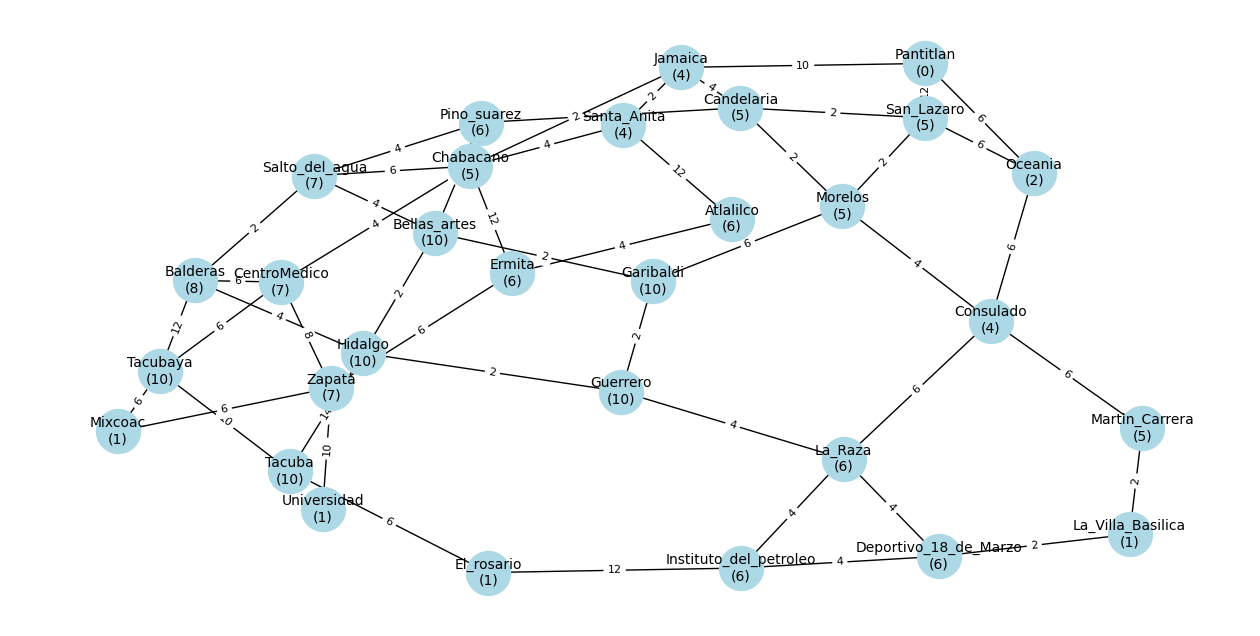

In [10]:
# Creamos un grafo para visualizar la dataseed
import networkx as nx
import matplotlib.pyplot as plt

def crear_grafo_metro(dictionaryConexionStations, dicctionaryValuesNode):
  grafo = nx.Graph()

  for estacion, sitios_visitados in dicctionaryValuesNode.items():
    grafo.add_node(estacion, sitios_visitados=sitios_visitados)

  for estacion, conexiones in dictionaryConexionStations.items():
    for conexion in conexiones:
      estacion_destino, costo = conexion
      grafo.add_edge(estacion, estacion_destino, costo=costo)

  return grafo

grafo_metro = crear_grafo_metro(dictionaryConexionStations, dicctionaryValuesNode)
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
pos = nx.spring_layout(grafo_metro)
labels_aristas = nx.get_edge_attributes(grafo_metro, 'costo')
labels_nodos = {nodo: f"{nodo}\n({grafo_metro.nodes[nodo]['sitios_visitados']})" for nodo in grafo_metro.nodes}

nx.draw(grafo_metro, with_labels=False, node_color='lightblue', node_size=1000, pos=pos, ax=ax)
nx.draw_networkx_labels(grafo_metro, pos, labels=labels_nodos, font_size=10)
nx.draw_networkx_edge_labels(grafo_metro, pos, edge_labels=labels_aristas, font_size=8)

plt.show()

###Creamos el algoritmo de búsqueda A*

In [9]:
import heapq  # Importamos el módulo heapq para manejar la cola de prioridad

# Implementación del algoritmo A* con costo basado en la distancia recorrida + valor del nodo final
def a_star(inicio, objetivo):
  """
  Algoritmo A* para encontrar la ruta óptima en la red de metro.

  Parámetros:
  - inicio (str): Estación de partida.
  - objetivo (str): Estación destino.

  Retorno:
  - ruta (list): Lista de estaciones en el camino óptimo.
  - costo_total (int): Costo total del recorrido considerando solo el valor del nodo final.
  """

  # Inicializamos la cola de prioridad con el nodo inicial (costo 0 y camino vacío)
  abierta = [(0, [inicio])]  # (costo acumulado, camino recorrido)
  visitados = set()  # Conjunto de estaciones exploradas para evitar ciclos

  # Mientras haya nodos por explorar en la cola de prioridad
  while abierta:
    # Extraemos el nodo con menor costo acumulado
    g_actual, camino = heapq.heappop(abierta)
    nodo_actual = camino[-1]  # Último nodo visitado en la ruta

    # Si ya visitamos esta estación, la omitimos
    if nodo_actual in visitados:
      continue
    visitados.add(nodo_actual)

    # Si alcanzamos el objetivo, calculamos el costo total y retornamos el resultado
    if nodo_actual == objetivo:
      f_objetivo = g_actual + dicctionaryValuesNode.get(nodo_actual, 0)  # Solo agregamos el valor del nodo final
      return camino, f_objetivo

    # Exploramos las estaciones conectadas al nodo actual
    for vecino, distancia in dictionaryConexionStations.get(nodo_actual, []):
      if vecino not in visitados:
        # Calculamos el costo acumulado del camino hasta el vecino
        g_n = g_actual + distancia

        # Agregamos el nuevo nodo a la cola de prioridad
        heapq.heappush(abierta, (g_n, camino + [vecino]))

  # Si no encontramos una ruta válida, retornamos un costo infinito
  return None, float('inf')

###Realizamos algunas pruebas

In [10]:
#Prueba1
inicio = "Pantitlan"
objetivo = "La_Villa_Basilica"

# Ejecutamos el algoritmo
ruta, costo_total = a_star(inicio, objetivo)

# Mostramos los resultados
print("Mejor ruta encontrada:", ruta)
print("Costo total:", costo_total)

Mejor ruta encontrada: ['Pantitlan', 'Oceania', 'Consulado', 'Martin_Carrera', 'La_Villa_Basilica']
Costo total: 21


In [11]:
#Prueba2
inicio = "Pantitlan"
objetivo = "Universidad"

# Ejecutamos el algoritmo
ruta, costo_total = a_star(inicio, objetivo)

# Mostramos los resultados
print("Mejor ruta encontrada:", ruta)
print("Costo total:", costo_total)

Mejor ruta encontrada: ['Pantitlan', 'Jamaica', 'Chabacano', 'CentroMedico', 'Zapata', 'Universidad']
Costo total: 35
